In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
levels_df = pd.read_csv('../data/levels.csv')
sessions_df = pd.read_csv('../data/player_session.csv')

In [4]:
print("Levels.csv")
print(levels_df.head())

Levels.csv
   level_id target_word difficulty  letter_count  estimated_duration_sec  \
0         0         CAT       Easy             3                      39   
1         1         SUN       Easy             3                      40   
2         2        MOON       Easy             4                      28   
3         3         DOG       Easy             3                      40   
4         4        TREE       Easy             4                      33   

   difficulty_score  
0              0.26  
1              0.30  
2              0.10  
3              0.16  
4              0.27  


In [5]:
print("\nPlayer Session.csv")
print(sessions_df.head())



Player Session.csv
    player_id player_segment  level_id  completion_time_sec  attempts  \
0  player_000        regular         6                 42.0         1   
1  player_000        regular        12                 81.0         3   
2  player_000        regular        17                 42.0         2   
3  player_000        regular        19                 29.0         1   
4  player_000        regular         4                 33.0         1   

   completed        date  
0       True  2025-07-19  
1       True  2025-07-29  
2       True  2025-07-09  
3       True  2025-07-16  
4       True  2025-07-10  


In [6]:
level_metrics = sessions_df.groupby('level_id').agg(
    total_attempts=('attempts', 'sum'),
    total_completions=('completed', 'sum'),
    avg_completion_time=('completion_time_sec', 'mean'),
    avg_attempts_per_player=('attempts', 'mean'),
    player_count=('player_id', 'nunique')
).reset_index()

level_metrics['completion_rate'] = level_metrics['total_completions'] / level_metrics['total_attempts']

In [7]:
level_metrics = level_metrics.merge(
    levels_df[['level_id', 'difficulty', 'difficulty_score']],
    on='level_id',
    how='left'
)


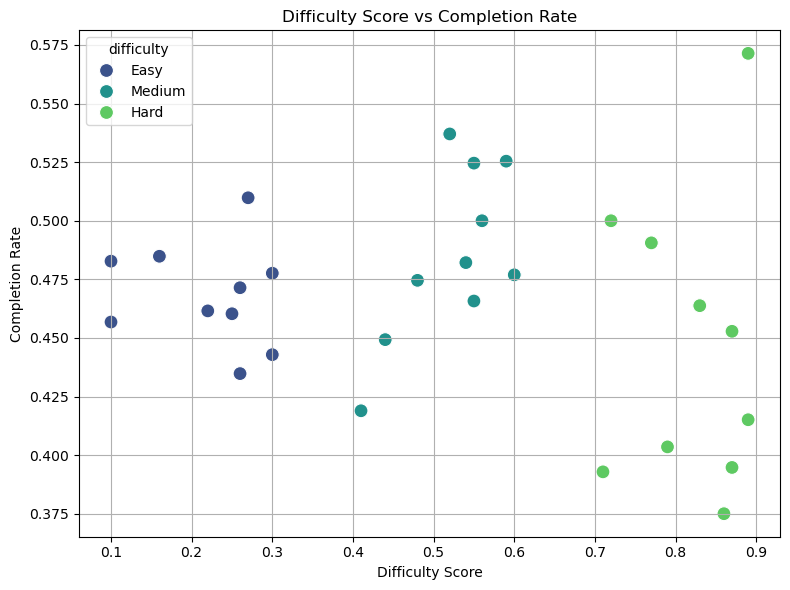

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=level_metrics,
    x='difficulty_score',
    y='completion_rate',
    hue='difficulty',
    palette='viridis',
    s=100
)
plt.title("Difficulty Score vs Completion Rate")
plt.xlabel("Difficulty Score")
plt.ylabel("Completion Rate")
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:

# This table helps you identify levels with low success and high difficulty.

level_metrics_sorted = level_metrics.sort_values(by='completion_rate')
level_metrics_sorted[['level_id', 'difficulty', 'difficulty_score', 
                      'completion_rate', 'avg_completion_time', 
                      'avg_attempts_per_player', 'player_count']]


,level_id,difficulty,difficulty_score,completion_rate,avg_completion_time,avg_attempts_per_player,player_count
29,29,Hard,0.86,0.375000,51.625000,2.064516,31
25,25,Hard,0.71,0.392857,55.969697,2.100000,40
28,28,Hard,0.87,0.394737,58.966667,2.054054,37
21,21,Hard,0.79,0.403509,54.565217,1.900000,30
27,27,Hard,0.89,0.415094,62.045455,1.892857,28
11,11,Medium,0.41,0.418919,56.935484,1.804878,41
8,8,Easy,0.26,0.434783,55.233333,1.916667,36
1,1,Easy,0.30,0.442857,57.677419,1.842105,38
12,12,Medium,0.44,0.449275,52.580645,2.029412,34
22,22,Hard,0.87,0.452830,59.166667,2.038462,26


### Correlation Heatmap

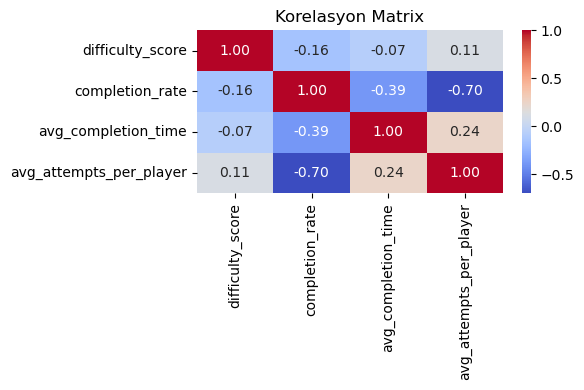

In [17]:
plt.figure(figsize=(6, 4))
sns.heatmap(level_metrics[['difficulty_score', 'completion_rate', 
                           'avg_completion_time', 'avg_attempts_per_player']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasyon Matrix")
plt.tight_layout()
plt.show()


In [18]:
level_metrics.to_csv("../outputs/level_performance_metrics.csv", index=False)
